In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [2]:
file_path = r"data\train_.csv"
train = pd.read_csv(file_path,parse_dates=['date_of_journey','dep_time','arrival_time'])
train

# at first we load our dataset with the required datatypes

C:\Users\91966\AppData\Local\Temp\ipykernel_7308\3017197068.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train = pd.read_csv(file_path,parse_dates=['date_of_journey','dep_time','arrival_time'])
C:\Users\91966\AppData\Local\Temp\ipykernel_7308\3017197068.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train = pd.read_csv(file_path,parse_dates=['date_of_journey','dep_time','arrival_time'])


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-05-27,Delhi,Cochin,2024-07-13 20:55:00,2024-07-13 12:35:00,940,1.0,In-flight meal not included,12898
1,Jet Airways,2019-06-12,Kolkata,Banglore,2024-07-13 18:55:00,2024-07-13 16:20:00,1285,1.0,No info,13044
2,Air India,2019-05-18,Delhi,Cochin,2024-07-13 09:45:00,2024-07-13 09:25:00,1420,2.0,No info,10975
3,Indigo,2019-06-03,Mumbai,Hyderabad,2024-07-13 21:20:00,2024-07-13 22:50:00,90,0.0,No info,2227
4,Jet Airways,2019-04-01,Mumbai,Hyderabad,2024-07-13 02:55:00,2024-07-13 04:20:00,85,0.0,No info,5678
...,...,...,...,...,...,...,...,...,...,...
6689,Spicejet,2019-06-09,Kolkata,Banglore,2024-07-13 11:35:00,2024-07-13 18:50:00,435,1.0,No info,8479
6690,Multiple Carriers,2019-05-09,Delhi,Cochin,2024-07-13 10:00:00,2024-07-13 01:30:00,930,1.0,No info,15078
6691,Air India,2019-05-18,Delhi,Cochin,2024-07-13 12:00:00,2024-07-13 07:40:00,1180,2.0,No info,8603
6692,Air Asia,2019-05-18,Delhi,Cochin,2024-07-13 07:55:00,2024-07-13 13:25:00,330,1.0,No info,8759


In [3]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6694 entries, 0 to 6693
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          6694 non-null   object        
 1   date_of_journey  6694 non-null   datetime64[ns]
 2   source           6694 non-null   object        
 3   destination      6694 non-null   object        
 4   dep_time         6694 non-null   datetime64[ns]
 5   arrival_time     6694 non-null   datetime64[ns]
 6   duration         6694 non-null   int64         
 7   total_stops      6694 non-null   float64       
 8   additional_info  6694 non-null   object        
 9   price            6694 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 523.1+ KB


We have only one NULL value in total_stops

In [5]:
train.describe(include="number")

,duration,total_stops,price
count,6694.000000,6694.000000,6694.000000
mean,637.633702,0.812668,9092.553331
std,504.395941,0.658143,4670.489223
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5277.000000
50%,515.000000,1.000000,8372.000000
75%,925.000000,1.000000,12373.000000
max,2860.000000,3.000000,79512.000000


In [6]:
# total_stops column have only 4 values so we will analyse it with categorical columns
(
    train
    .assign(total_stops=train["total_stops"].astype(object))
    .describe(include="O")
)

,airline,source,destination,total_stops,additional_info
count,6694,6694,6694,6694.0,6694
unique,9,5,6,4.0,9
top,Jet Airways,Delhi,Cochin,1.0,No info
freq,2387,2781,2781,3638.0,5225


In [7]:
forest = IsolationForest(n_estimators=100,random_state=42)

In [8]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-05-27,Delhi,Cochin,2024-07-13 20:55:00,2024-07-13 12:35:00,940,1.0,In-flight meal not included,12898
1,Jet Airways,2019-06-12,Kolkata,Banglore,2024-07-13 18:55:00,2024-07-13 16:20:00,1285,1.0,No info,13044
2,Air India,2019-05-18,Delhi,Cochin,2024-07-13 09:45:00,2024-07-13 09:25:00,1420,2.0,No info,10975
3,Indigo,2019-06-03,Mumbai,Hyderabad,2024-07-13 21:20:00,2024-07-13 22:50:00,90,0.0,No info,2227
4,Jet Airways,2019-04-01,Mumbai,Hyderabad,2024-07-13 02:55:00,2024-07-13 04:20:00,85,0.0,No info,5678
...,...,...,...,...,...,...,...,...,...,...
6689,Spicejet,2019-06-09,Kolkata,Banglore,2024-07-13 11:35:00,2024-07-13 18:50:00,435,1.0,No info,8479
6690,Multiple Carriers,2019-05-09,Delhi,Cochin,2024-07-13 10:00:00,2024-07-13 01:30:00,930,1.0,No info,15078
6691,Air India,2019-05-18,Delhi,Cochin,2024-07-13 12:00:00,2024-07-13 07:40:00,1180,2.0,No info,8603
6692,Air Asia,2019-05-18,Delhi,Cochin,2024-07-13 07:55:00,2024-07-13 13:25:00,330,1.0,No info,8759


In [9]:
(
    train
    .dropna()  # Drop rows with any null values
    .assign(outlier=lambda x: forest.fit_predict(  # lambda function because we want to check for outliers after removing the NULL values
        x.drop(columns="price")
        .select_dtypes(include="number")   # use columns tht have data type as numbers 
    ))
    .query("outlier==-1")
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
1,Jet Airways,2019-06-12,Kolkata,Banglore,2024-07-13 18:55:00,2024-07-13 16:20:00,1285,1.0,No info,13044,-1
2,Air India,2019-05-18,Delhi,Cochin,2024-07-13 09:45:00,2024-07-13 09:25:00,1420,2.0,No info,10975,-1
3,Indigo,2019-06-03,Mumbai,Hyderabad,2024-07-13 21:20:00,2024-07-13 22:50:00,90,0.0,No info,2227,-1
4,Jet Airways,2019-04-01,Mumbai,Hyderabad,2024-07-13 02:55:00,2024-07-13 04:20:00,85,0.0,No info,5678,-1
7,Jet Airways,2019-05-09,Delhi,Cochin,2024-07-13 23:05:00,2024-07-13 04:25:00,1760,2.0,No info,15129,-1
...,...,...,...,...,...,...,...,...,...,...,...
6678,Jet Airways,2019-03-24,Banglore,New Delhi,2024-07-13 05:45:00,2024-07-13 10:25:00,280,1.0,In-flight meal not included,8147,-1
6681,Jet Airways,2019-06-21,Delhi,Cochin,2024-07-13 11:00:00,2024-07-13 14:15:00,195,0.0,In-flight meal not included,4256,-1
6682,Jet Airways,2019-05-01,Kolkata,Banglore,2024-07-13 09:35:00,2024-07-13 14:25:00,1730,1.0,No info,11467,-1
6687,Jet Airways,2019-06-15,Delhi,Cochin,2024-07-13 21:25:00,2024-07-13 12:35:00,910,2.0,In-flight meal not included,9905,-1


so we will later analyse why the above values are outliers


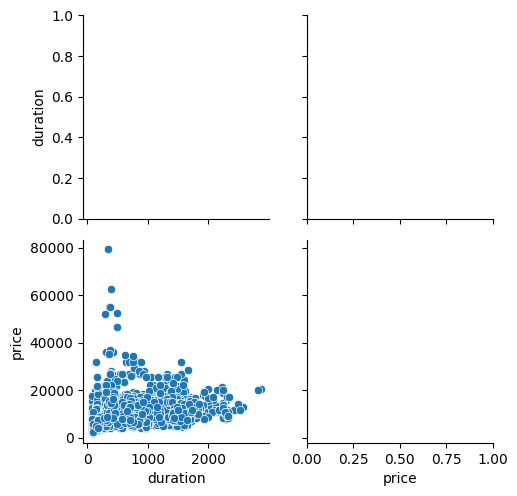

In [10]:
pair_grid = sns.PairGrid(
    data=train[['duration','price']]
)
pair_grid.map_lower(sns.scatterplot)

so we can see a linear relationship between price and duration by seeing the graph. We will check this correlation later on mathematically

[Text(0.5, 1.0, 'Spearman Correlation Matrix Heatmap')]

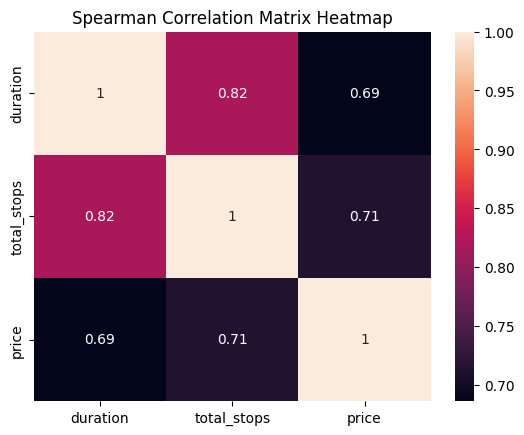

In [11]:
cm = train.corr(method="spearman",numeric_only=True)

fig,ax = plt.subplots()

sns.heatmap(
    cm,
    annot=True
)

ax.set(title="Spearman Correlation Matrix Heatmap")

In [12]:
from scipy import stats
import statsmodels.api as sm

def cramers_v(data, var1, var2):
  ct = pd.crosstab(
      data.loc[:, var1],
      data.loc[:, var2]
  )
  r, c = ct.shape
  n = ct.sum().sum()
  chi2 = stats.chi2_contingency(ct).statistic
  phi2 = chi2 / n

  # bias correction
  phi2_ = max(0, phi2 - ((r - 1) * (c - 1) / (n - 1)))
  r_ = r - (((r - 1) ** 2) / (n - 1))
  c_ = c - (((c - 1) ** 2) / (n - 1))

  return np.sqrt(phi2_ / min(r_ - 1, c_ - 1))

[Text(0.5, 1.0, "Cramer's V Correlation Matrix Heatmap")]

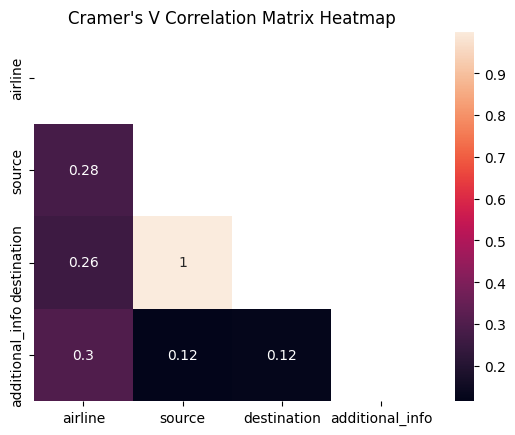

In [13]:
cols = train.select_dtypes(include="O").columns.to_list()
matrix = (
    pd.DataFrame(
        data = np.ones((len(cols),(len(cols))))
    )
    .set_axis(cols,axis=0)
    .set_axis(cols,axis=1)
)
for col1 in cols:
    for col2 in cols:
        if col1 != col2:
            matrix.loc[col1,col2] = cramers_v(train,col1,col2)

mask = np.zeros_like(matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots()

sns.heatmap(
    matrix,
    annot=True,
    mask = mask
)

ax.set(title="Cramer's V Correlation Matrix Heatmap")

In [14]:
train.airline

0             Jet Airways
1             Jet Airways
2               Air India
3                  Indigo
4             Jet Airways
              ...        
6689             Spicejet
6690    Multiple Carriers
6691            Air India
6692             Air Asia
6693    Multiple Carriers
Name: airline, Length: 6694, dtype: object

In [15]:
train['airline'].describe()

count            6694
unique              9
top       Jet Airways
freq             2387
Name: airline, dtype: object

In [16]:
train['airline'].value_counts(normalize = True)

airline
Jet Airways          0.356588
Indigo               0.191365
Air India            0.162384
Multiple Carriers    0.114730
Spicejet             0.079773
Vistara              0.044966
Air Asia             0.032118
Goair                0.017927
Trujet               0.000149
Name: proportion, dtype: float64

In [17]:
def bar_chart(counts, colors, ax):
  barplot = ax.bar(
        x=range(len(counts)),
        height=counts.values,
        tick_label=counts.index,
        color=colors,
        edgecolor="black",
        alpha=0.7
  )

  ax.bar_label(
      barplot,
      padding=5,
      color="black"
  )

  ax.set(
      title="Bar Chart",
      xlabel="Categories",
      ylabel="Count"
  )

  ax.set_xticklabels(
      ax.get_xticklabels(),
      rotation=45,
      ha="right"
  )


def pie_chart(counts, colors, ax):
  pie = ax.pie(
        counts.values,
        labels=counts.index,
        autopct="%.2f%%",
        colors=colors,
        wedgeprops=dict(alpha=0.7, edgecolor="black"),
  )

  ax.set_title("Pie Chart")

  ax.legend(
      loc="upper left",
      bbox_to_anchor=(1.02, 1),
      title="Categories",
      title_fontproperties=dict(weight="bold", size=10)
  )

  plt.setp(
      pie[2],
      weight="bold",
      color="white"
  )

In [18]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


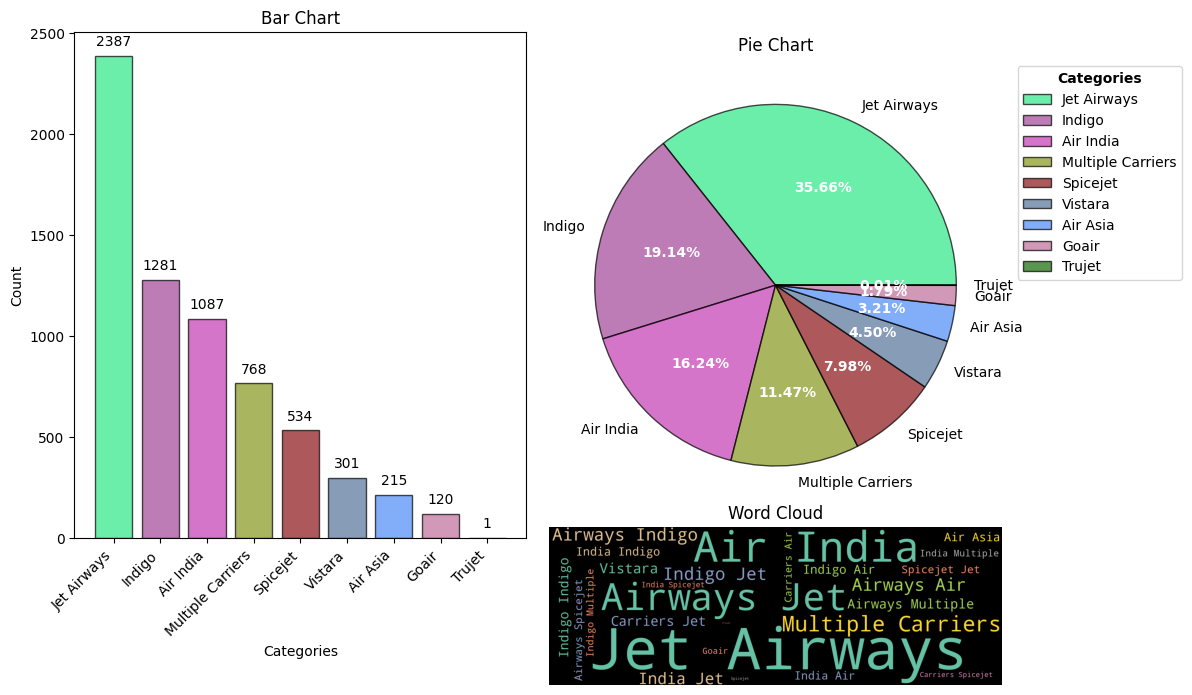

In [19]:
from matplotlib.gridspec import GridSpec
from wordcloud import WordCloud, STOPWORDS

fig = plt.figure(figsize=(12,12))
gs = GridSpec(2,2,figure=fig)   # to make Grid from the figure 
ax1 = fig.add_subplot(gs[0,0])  # bar-chart
ax2 = fig.add_subplot(gs[0,1])  # pie-chart
ax3 = fig.add_subplot(gs[1:])   # word-cloud

counts = (
    train['airline'].value_counts()
)

len(counts)
colors = [tuple(np.random.choice(256,size=3)/255) for _ in range(len(counts))]

bar_chart(
    counts,
    colors,
    ax1
)

pie_chart(
    counts,
    colors,
    ax2
)

var_string = " ".join(
    train.loc[:,'airline']
    .dropna()
    .replace(" ","_")
    .to_list()
)

word_cloud = WordCloud(
        width=2000,
        height=700,
        random_state=42,
        background_color="black",
        colormap="Set2",
        stopwords=STOPWORDS
    ).generate(var_string)

ax3.imshow(word_cloud)
ax3.axis("off")
ax3.set_title("Word Cloud")

plt.tight_layout()
plt.show()

So we can see that we have total 9 airlines category but only 4 of them occurs more than 10 percent times and hence we will club the remaining into a category called others

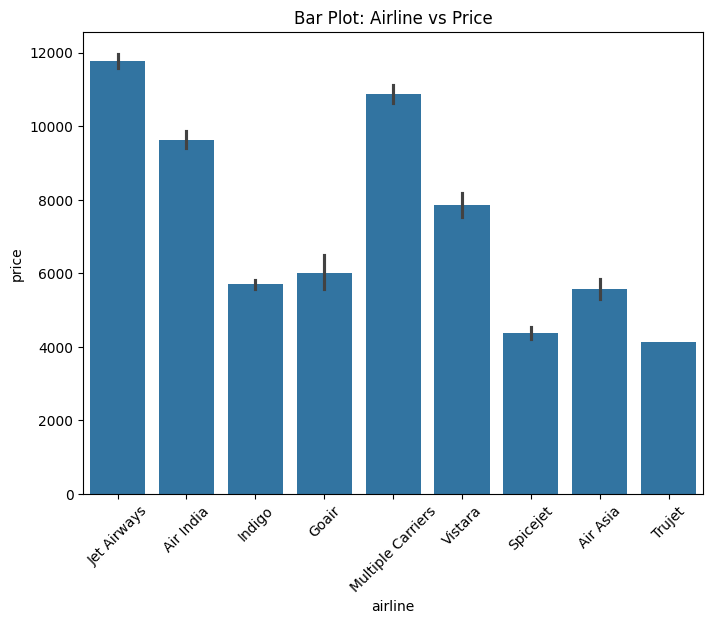

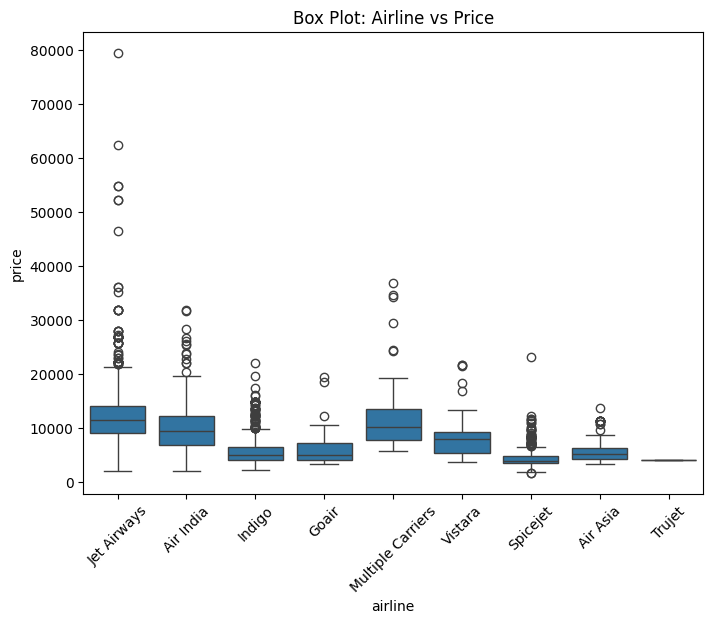

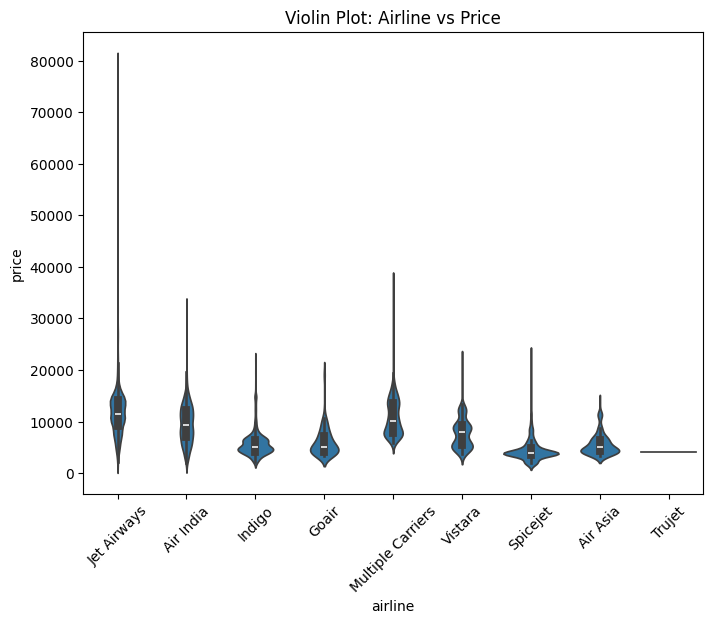

In [20]:
# Bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='airline', y='price', data=train)
plt.title('Bar Plot: Airline vs Price')
plt.xticks(rotation=45)
plt.show()

# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='airline', y='price', data=train)
plt.title('Box Plot: Airline vs Price')
plt.xticks(rotation=45)
plt.show()

# Violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='airline', y='price', data=train)
plt.title('Violin Plot: Airline vs Price')
plt.xticks(rotation=45)
plt.show()

So from the bar graph we can see that airlines could be a crucial component for calculating price as all the airlines are having different mean price.

Also, from the box plot we can see that we have some outliers also. We have to check whether they are outliers or are real values

In [21]:
groups_df = (
    train.dropna(subset=['price'])
    .groupby('airline')
)

groups = [group['price'].values for _,group in groups_df]
# groups
anova = stats.f_oneway(*groups)
statistic = anova[0]
pvalue = anova[1]
print(f"- {'Significance Level':21}: {0.05* 100}%")
print(f"- {'Null Hypothesis':21}: The groups have similar population mean")
print(f"- {'Alternate Hypothesis':21}: The groups don't have similar population mean")
print(f"- {'Test Statistic':21}: {statistic}")
print(f"- {'p-value':21}: {pvalue}")
if pvalue < 0.05:
    print(f"- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5% significance level")
    print(f"- CONCLUSION: The variables price and airline are associated to each other")
else:
    print(f"- Since p-value is greater than 0.05, we Fail to Reject the Null Hypothesis at 5% significance level")
    print(f"- CONCLUSION: The variables price and airline are not associated to each other")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 446.0707433362749
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5% significance level
- CONCLUSION: The variables price and airline are associated to each other


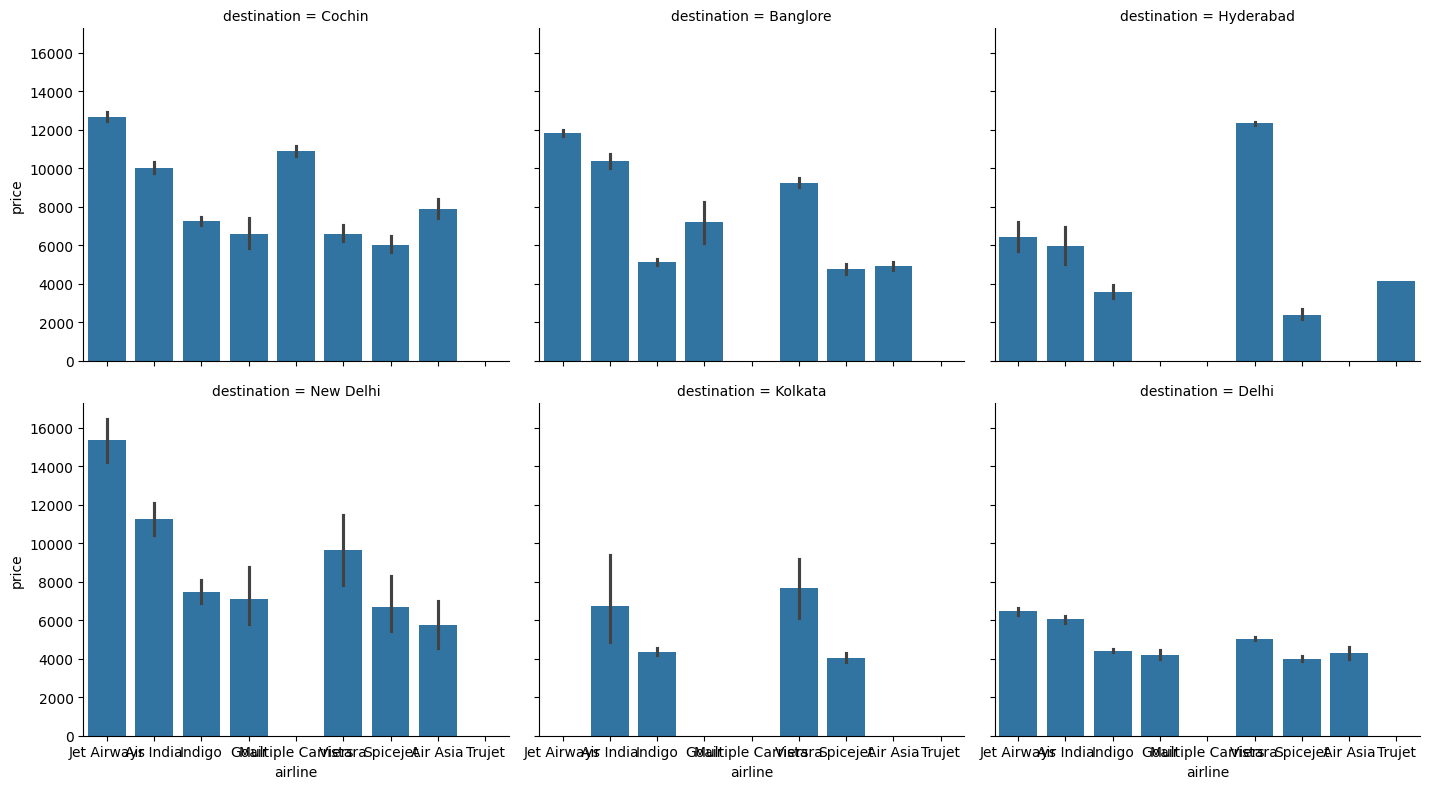

In [22]:
airline_grid = sns.FacetGrid(
    data=train,
    col="destination",
    col_wrap=3,
    height=4,
    aspect=1.2,
    sharey=True
)

airline_grid.map(sns.barplot,"airline","price",order=train.airline.unique())

From the hypothesis testing also we are concluding that airline and price column are related

In [23]:
train.date_of_journey

0      2019-05-27
1      2019-06-12
2      2019-05-18
3      2019-06-03
4      2019-04-01
          ...    
6689   2019-06-09
6690   2019-05-09
6691   2019-05-18
6692   2019-05-18
6693   2019-04-09
Name: date_of_journey, Length: 6694, dtype: datetime64[ns]

C:\Users\91966\AppData\Local\Temp\ipykernel_7308\3064985274.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
C:\Users\91966\AppData\Local\Temp\ipykernel_7308\3064985274.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  t = ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)


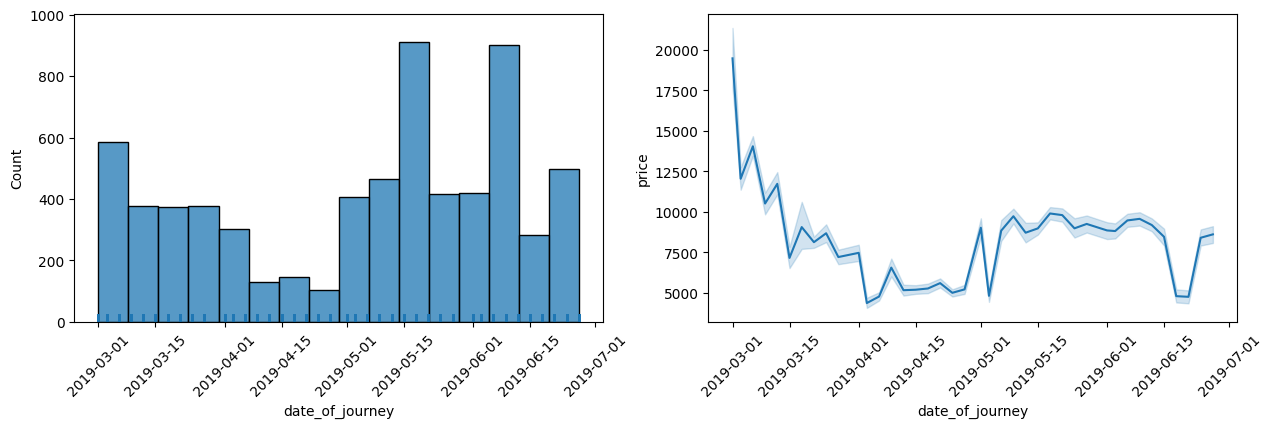

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

sns.histplot(
    data=train,
    x='date_of_journey',
    bins='auto',
    ax=ax1,
)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

sns.rugplot(
    data = train,
    x='date_of_journey',
    ax=ax1
)

sns.lineplot(
    data=train,
    x='date_of_journey',
    y='price',
    ax=ax2
)
t = ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

C:\Users\91966\AppData\Local\Temp\ipykernel_7308\2915321089.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  train.groupby(pd.Grouper(key="date_of_journey",freq="M"))


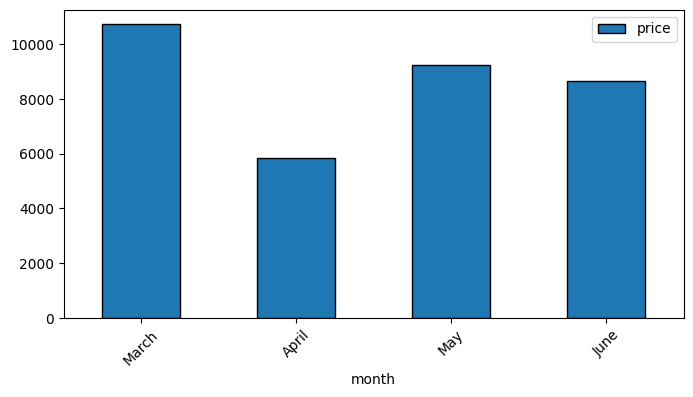

In [25]:
(
    train.groupby(pd.Grouper(key="date_of_journey",freq="M"))
    .price.mean()
    .to_frame()
    .set_axis(["March","April","May","June"],axis=0)
    .rename_axis(index="month")
    .plot(
        kind="bar",
        figsize=(8,4),
        edgecolor="black"
    )
)
ax = plt.gca()
t = ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

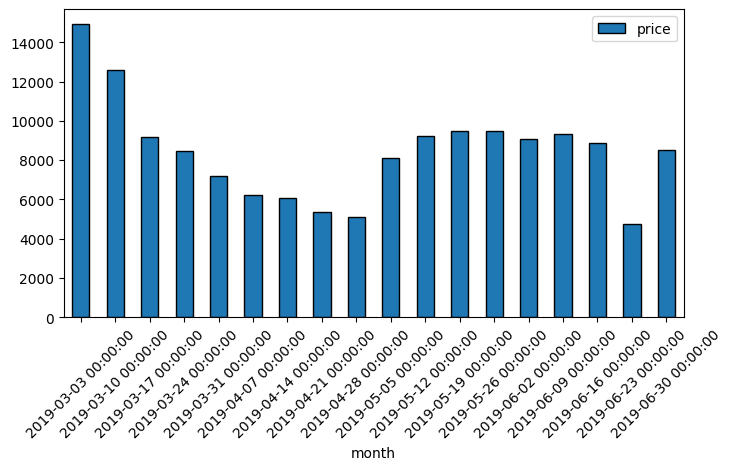

In [26]:
(
    train.groupby(pd.Grouper(key="date_of_journey",freq="W"))
    .price.mean()
    .to_frame()
    # .set_axis(["March","April","May","June"],axis=0)
    .rename_axis(index="month")
    .plot(
        kind="bar",
        figsize=(8,4),
        edgecolor="black"
    )
)
ax = plt.gca()
t = ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

C:\Users\91966\AppData\Local\Temp\ipykernel_7308\4001836242.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  train.groupby([pd.Grouper(key="date_of_journey",freq="M"),"source"])


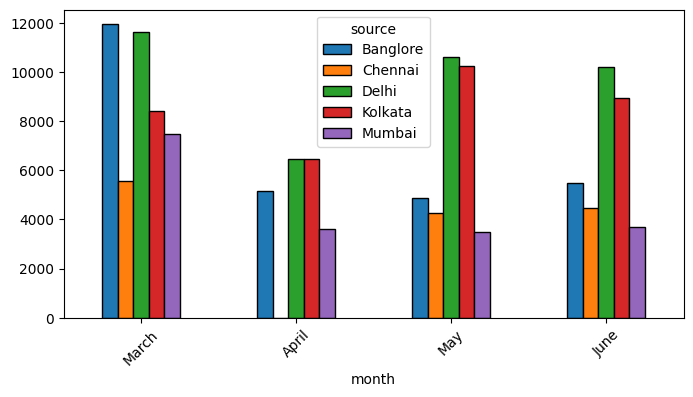

In [27]:
(
    train.groupby([pd.Grouper(key="date_of_journey",freq="M"),"source"])
    .price.mean()
    .unstack(fill_value=0)
    .set_axis(["March","April","May","June"],axis=0)
    .rename_axis(index="month")
    .plot(
        kind="bar",
        figsize=(8,4),
        edgecolor="black"
    )
)
ax = plt.gca()
t = ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

From the above grpahs and plots we can conclude that date of flight is also crucial in determining the price of the flight. Also, we can see that the prices of the flights is initially high and it decreases with time till the month of may and then it increase and becomes constant.

In [28]:
train.dep_time

0      2024-07-13 20:55:00
1      2024-07-13 18:55:00
2      2024-07-13 09:45:00
3      2024-07-13 21:20:00
4      2024-07-13 02:55:00
               ...        
6689   2024-07-13 11:35:00
6690   2024-07-13 10:00:00
6691   2024-07-13 12:00:00
6692   2024-07-13 07:55:00
6693   2024-07-13 08:00:00
Name: dep_time, Length: 6694, dtype: datetime64[ns]

C:\Users\91966\AppData\Local\Temp\ipykernel_7308\4176606416.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
C:\Users\91966\AppData\Local\Temp\ipykernel_7308\4176606416.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  t = ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)


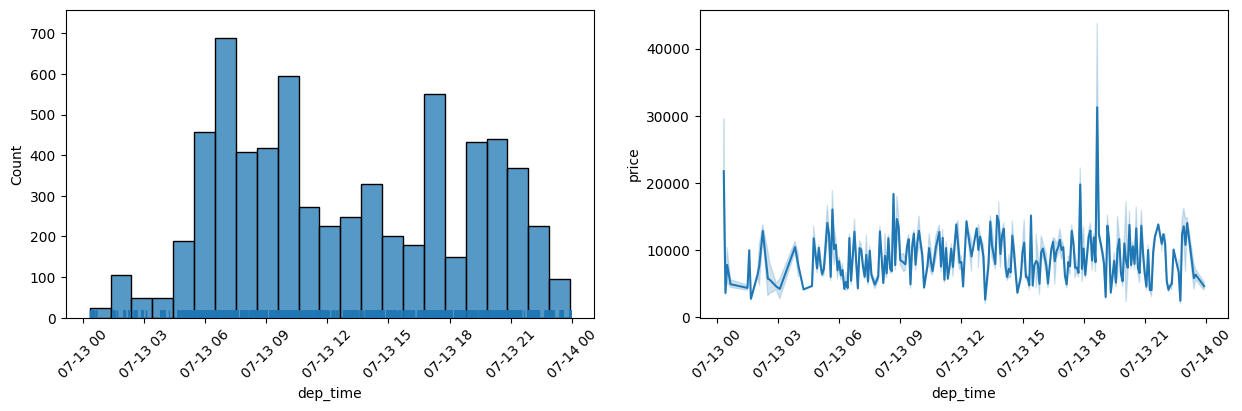

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

sns.histplot(
    data=train,
    x='dep_time',
    bins='auto',
    ax=ax1,
)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

sns.rugplot(
    data = train,
    x='dep_time',
    ax=ax1
)

sns.lineplot(
    data=train,
    x='dep_time',
    y='price',
    ax=ax2
)
t = ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

In [30]:
def create_plots(df,col):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    sns.barplot(x=col, y='price', data=df, ax=axes[0])
    sns.boxplot(x=col, y='price', data=df, ax=axes[1])
    sns.violinplot(x=col, y='price', data=df, ax=axes[2])

    for ax in axes:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

C:\Users\91966\AppData\Local\Temp\ipykernel_7308\231962831.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\91966\AppData\Local\Temp\ipykernel_7308\231962831.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\91966\AppData\Local\Temp\ipykernel_7308\231962831.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


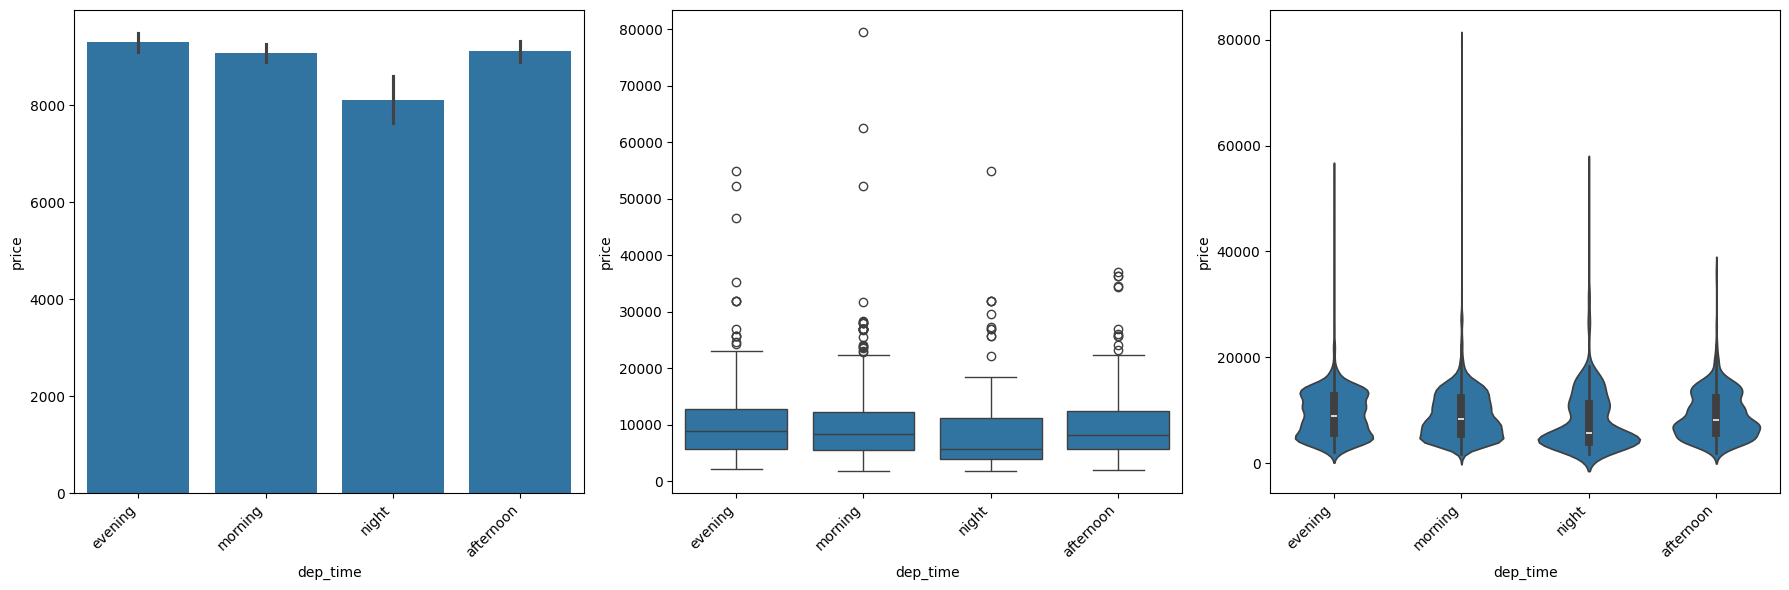

In [31]:
(
    train
    .assign(dep_time=lambda df_:(   # so here we are changing departure time to four slots morning, afternoon, evening and night                                        
        np.select([df_.dep_time.dt.hour.between(4,10,inclusive="left"),
                   df_.dep_time.dt.hour.between(10,16,inclusive="left"),
                   df_.dep_time.dt.hour.between(16,22,inclusive="left")],
                   ["morning","afternoon","evening"],
                   default="night") 
    ))
    .pipe( 
        lambda df_: create_plots(df_,'dep_time')
    )
)

From the bar Plot we can see that thecount of flights is less in Late night and early morning also the count of flight in the afternoon around 12 P.M. to 3 P.M but the line plots shows that the price remains same the whole day and when we split the day into morning, afternoon, evening, night the difference between prices isn't much which we infer from the line plot

In [32]:
train.duration

0        940
1       1285
2       1420
3         90
4         85
        ... 
6689     435
6690     930
6691    1180
6692     330
6693     660
Name: duration, Length: 6694, dtype: int64

In [33]:
train['duration'].describe()

count    6694.000000
mean      637.633702
std       504.395941
min        75.000000
25%       170.000000
50%       515.000000
75%       925.000000
max      2860.000000
Name: duration, dtype: float64

In [34]:
train['duration'].median()

515.0

[Text(0.5, 1.0, 'QQ Plot')]

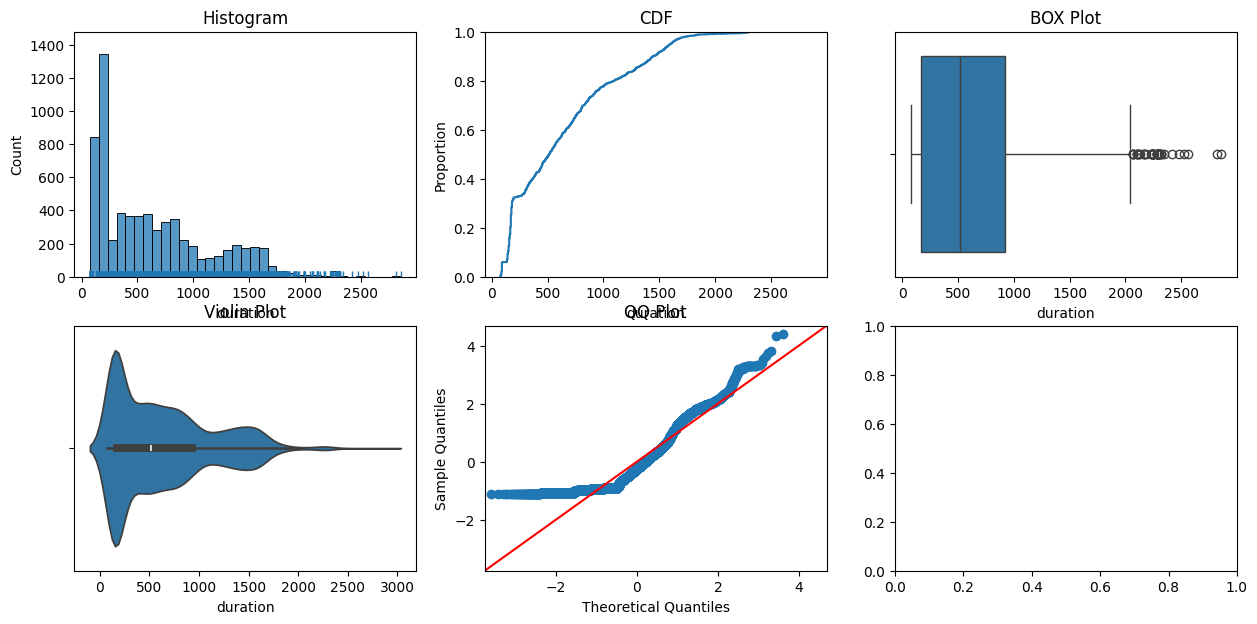

In [35]:
fig, axes = plt.subplots(2, 3, figsize=(15,7))
axes = axes.ravel()
sns.histplot(
    train,
    x='duration',
    ax=axes[0]
)
sns.rugplot(
    train,
    x='duration',
    ax=axes[0]
)
axes[0].set(title="Histogram")

sns.ecdfplot(
    train,
    x='duration',
    ax=axes[1]
)
axes[1].set(title="CDF")

sns.boxplot(
    train,
    x='duration',
    ax=axes[2]
)
axes[2].set(title="BOX Plot")

sns.violinplot(
    train,
    x='duration',
    ax=axes[3]
)
axes[3].set(title="Violin Plot")

sm.qqplot(
    train['duration'],
    line="45",
    fit=True,
    ax=axes[4]
)
axes[4].set(title="QQ Plot")

So min duration is 75 minutes and maximum is 2860 minutes with median around 510 minutes. Also, from the bar Plot we can see that many flights have very less duration and most of them have duration less than 1000 minutes. Also, outliers are the values having very high duration value and this can also be seen in the violin plot.

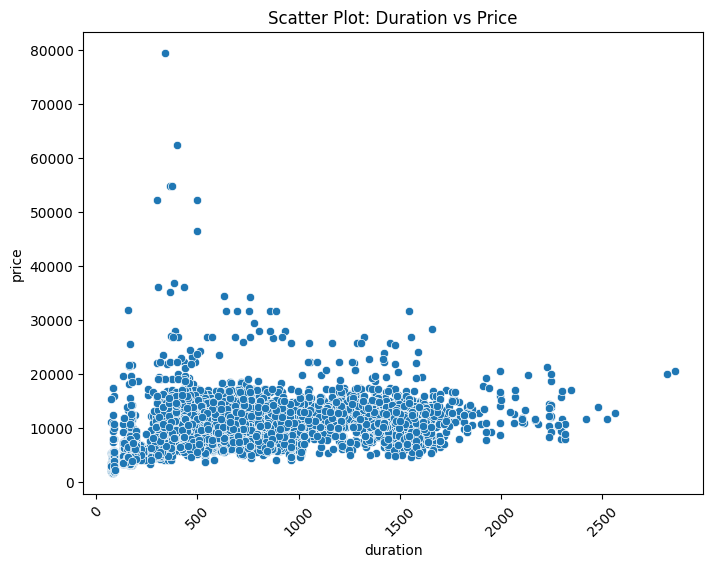

In [36]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='duration', y='price', data=train)
plt.title('Scatter Plot: Duration vs Price')
plt.xticks(rotation=45)
plt.show()

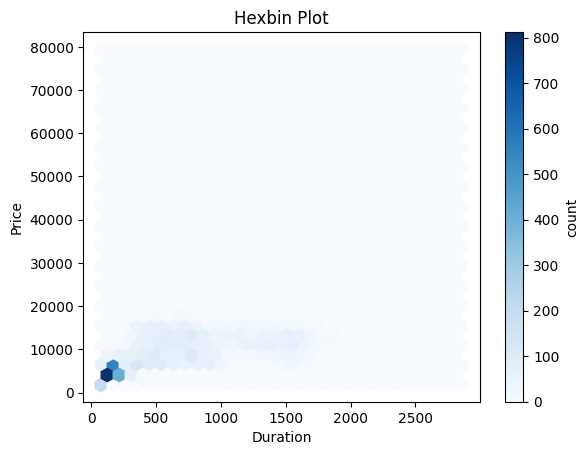

In [37]:
plt.hexbin(train['duration'], train['price'], gridsize=30, cmap='Blues',)

# Add a color bar which maps values to colors
plt.colorbar(label='count')

# Add labels and title
plt.xlabel('Duration')
plt.ylabel('Price')
plt.title('Hexbin Plot')

plt.show()

These above plot show that duration and price might have Linear relationship and similar result we get with hypothesis test.

In [38]:
pearson = stats.pearsonr(train['duration'].values, train['price'].values)
pvalue = pearson.pvalue
statistic = pearson.statistic
print(f"- {'Significance Level':21}: 5%")
print(f"- {'Null Hypothesis':21}: The samples are uncorrelated")
print(f"- {'Alternate Hypothesis':21}: The samples are correlated")
print(f"- {'Test Statistic':21}: {statistic}")
print(f"- {'p-value':21}: {pvalue}")
if pvalue < 0.05:
    print(f"- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5% significance level")
    print(f"- CONCLUSION: The variables Duration and Price are correlated")
else:
    print(f"- Since p-value is greater than 0.05, we Fail to Reject the Null Hypothesis at 5% significance level")
    print(f"- CONCLUSION: The variables Duration and Price are uncorrelated")

- Significance Level   : 5%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.48835802027266345
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5% significance level
- CONCLUSION: The variables Duration and Price are correlated


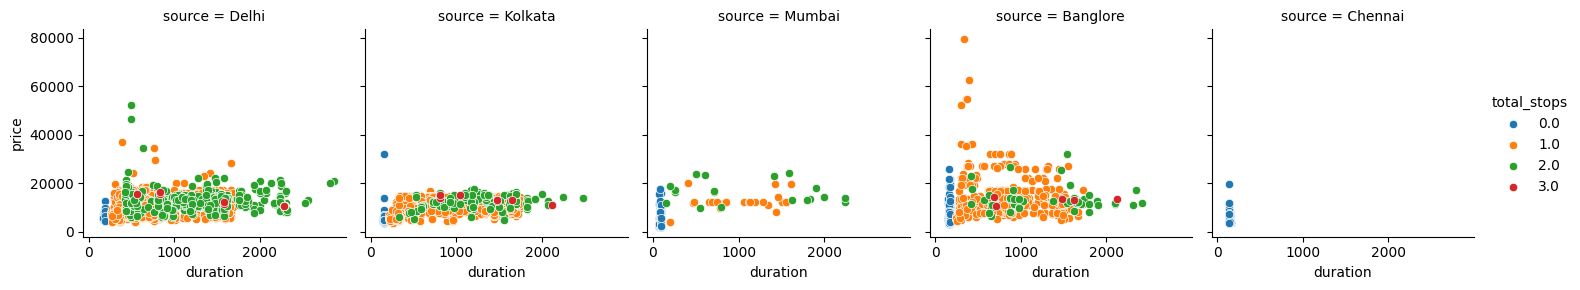

In [39]:
duration_grid = sns.FacetGrid(
    data=train,
    col="source",
    hue="total_stops",
    sharey=True
)

duration_grid.map(sns.scatterplot,"duration","price")
duration_grid.add_legend()

Here we gwt some crucial info about how price, duration and stops are related like if there are 0 stops then the duration of flights in very less and as number of stops increase to 1 and 2 duration of flight also increases. Also, there are very less flights from chennai and all those flights have 0 total_stops. Also there are very few Flights with 3 stops in-between.

In [40]:
t = train['duration'].quantile([0.25,0.5,0.75])
iqr = t[0.75]-t[0.25]
lower_limit = t[0.25]-(1.5)*iqr
upper_limit = t[0.75]+(1.5)*iqr
print(f"IOR : {iqr}")
print(f"Lower Limit : {lower_limit}")
print(f"Upper Limit : {upper_limit}")
outlier = train[(train['duration']<lower_limit) | (train['duration']>upper_limit)]
print(outlier)
print(len(outlier))

IOR : 755.0
Lower Limit : -962.5
Upper Limit : 2057.5
          airline date_of_journey    source destination            dep_time  \
271     Air India      2019-05-15   Kolkata    Banglore 2024-07-13 05:50:00   
319   Jet Airways      2019-03-06     Delhi      Cochin 2024-07-13 05:30:00   
331     Air India      2019-05-15     Delhi      Cochin 2024-07-13 05:00:00   
345     Air India      2019-03-27     Delhi      Cochin 2024-07-13 05:00:00   
421   Jet Airways      2019-03-06     Delhi      Cochin 2024-07-13 19:10:00   
425     Air India      2019-03-03     Delhi      Cochin 2024-07-13 07:05:00   
447   Jet Airways      2019-03-03     Delhi      Cochin 2024-07-13 05:40:00   
730     Air India      2019-05-12   Kolkata    Banglore 2024-07-13 12:00:00   
984     Air India      2019-06-06     Delhi      Cochin 2024-07-13 05:00:00   
1078  Jet Airways      2019-03-27     Delhi      Cochin 2024-07-13 05:25:00   
1138  Jet Airways      2019-03-06     Delhi      Cochin 2024-07-13 16:50:00  

Here we get to know that there are 49 outliers according to box-plot. We will analyse more about why these values are like that and are they actually outliers or not.

In [41]:
train['additional_info'].describe()

count        6694
unique          9
top       No info
freq         5225
Name: additional_info, dtype: object

In [42]:
train['additional_info'].value_counts(normalize=True)

additional_info
No info                         0.780550
In-flight meal not included     0.183747
No check-in baggage included    0.031969
1 Long layover                  0.002091
Change airports                 0.000747
Business class                  0.000448
No Info                         0.000149
1 Short layover                 0.000149
Red-eye flight                  0.000149
Name: proportion, dtype: float64

C:\Users\91966\AppData\Local\Temp\ipykernel_7308\231962831.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\91966\AppData\Local\Temp\ipykernel_7308\231962831.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\91966\AppData\Local\Temp\ipykernel_7308\231962831.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


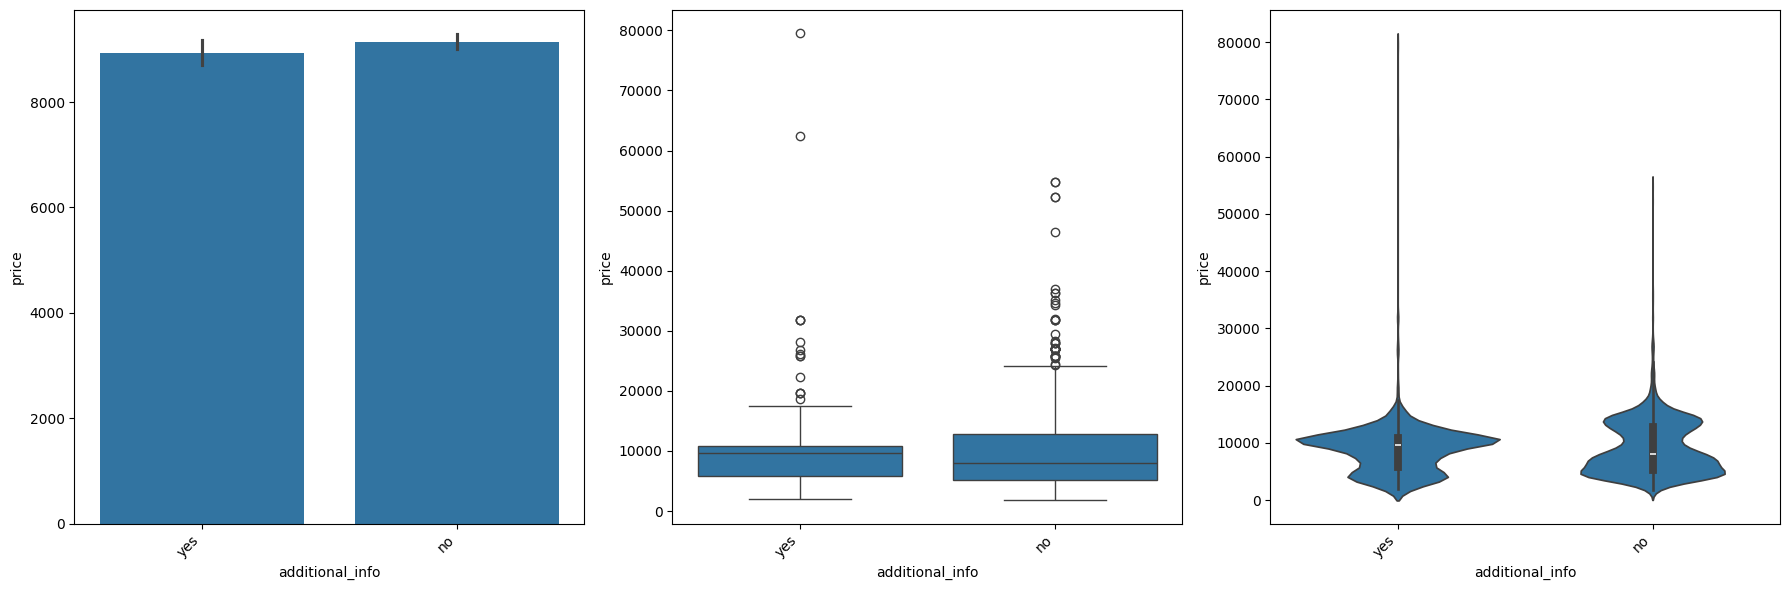

In [43]:
# as we can clearly see that No info occurs 80 percent of the time so we will merge all the other categories into one 

(
    train
    .assign(additional_info=(
        train
        .additional_info
        .pipe(lambda ser: np.where(ser.eq("No info"),"no","yes"))
    ))
    # .pipe(lambda df_:create_plots(df_))
    .pipe( 
        lambda df_: create_plots(df_,'additional_info')
    )
)

We can see that out of 6 categories one occurs most of the time(80 percent) and hence we decided to combine all the other categories into one(have-info). We can see that the price for both the cagtegories are almost same. Also, we are not getting much inforamtion about price from other plots and hence this might not be crucial factor fror predicitng price but we should check whether the additional info column along with some other column helps in determining price or not.